# Let's Get That Data!

In [1]:
#First, The Imports
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# Every returned Out[] is displayed, not just the last one. (Thanks NaRae!)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# the key variables
consumerKey = "XXXXXXXX"
consumerSecret ="XXXXXXX"

In [3]:
#authentication
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

#connecting to Twitter API
api = tweepy.API(auth)

In [4]:
# this is helpful for later but I need to read in the .csv files so I can append them later
#tcat = pd.read_csv(r'cat_tweets.csv')
#tdog = pd.read_csv(r'dog_tweets.csv')
filepath = "/Users/Margaret/Documents/Data_Science/Project_Margaret/"

In [5]:
#getting cat and dog search results
#NOTE: The dog neologisms I will compare: doggo and doge
#NOTE: The cat neologisms I will compare: kitteh and toebeans
rDog = api.search(q='%23dog')
rDogs = api.search(q='%23dogs')
rDoggo = api.search(q='%23doggo')
rDoge = api.search(q='%23doge')
rCat = api.search(q='%23cat')
rCats = api.search(q='%23cats')
rToeBeans = api.search(q='%23toebeans')
rKitteh = api.search(q='%23kitteh')

In [6]:
#Get the first 1000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='%23dog').items(1000):
    rDog.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23doggo').items(1000):
    rDoggo.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23doge').items(1000):
    rDoge.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23cat').items(1000):
    rCat.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23toebeans').items(1000):
    rToeBeans.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23kitteh').items(1000):
    rKitteh.append(tweet)

In [7]:
#Adding in the plurals
for tweet in tweepy.Cursor(api.search, q='%23dogs').items(1000):
    rDogs.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23cats').items(1000):
    rCats.append(tweet)

In [8]:
#Verify the number of items returned
len(rDog)
len(rDogs)
len(rDoge)
len(rDoggo)
len(rCat)
len(rCats)
len(rToeBeans)
len(rKitteh)

1015

1015

1015

1015

1015

1015

73

160

### Even already it is interesting to see that ToeBeans and Kitteh are already returning a lot less results. This likely means that they are fairly unpopular terms (at least to tag your tweet with) which is interesting.  
#### This also means that if this trend continues (which it has been up to this point), it is already clear that Dogs get more posts than cats.
  
### Below is an example of a tweet as well as some additional information about it. This is the only tweet I will show, in attempts to not go against the data-sharing agreement. However, this is what the data I'm working with looks like.

In [10]:
#this is an example of a tweet
tweet1 = rDog[1] #get the data of the first tweet.

#then, print tweet. 
print(tweet1.text)

#other additional info about the tweet for reference
tweet1.lang                    #the tweet is in English
tweet1.user.screen_name        #this is the username
tweet1.user.description        #self description of user by user posted on profile
tweet1.created_at              #date and time tweet was created
tweet1.id                      #Tweet ID #
tweet1.favorite_count          #how many likes the tweet received (in this case 0)

RT @collectivewhim: How COOL is this Robot #dog?! If your #kid is into #tech they will♥programming their own #pet! #Christmas #Toys #Coding…


'en'

'MoneySvgParent'

'Mom. Blogger. Writer. Social Media Influencer. Speaker. Featuring Family Travel. Food. Twitter Parties.'

datetime.datetime(2017, 11, 2, 16, 25, 41)

926123155495714817

0

In [9]:
# this is a function found here: http://blog.impiyush.com/2015/03/data-analysis-using-twitter-api-and.html
# I am using this to clean my data into a dataframe, it has been altered slightly (mostly deletion) for my project.
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

In [10]:
#Do this funciton on the tweets, then connect the dataframes
dog_df = toDataFrame(rDog)
dogs_df = toDataFrame(rDogs)
doge_df = toDataFrame(rDoge)
doggo_df = toDataFrame(rDoggo)
cat_df = toDataFrame(rCat)
cats_df = toDataFrame(rCats)
toebeans_df = toDataFrame(rToeBeans)
kitteh_df = toDataFrame(rKitteh)

#Adding a column to say which hashtag it came from
dog_df['Hashtag'] = "dog"
dogs_df['Hashtag'] = "dogs" 
doge_df['Hashtag'] = "doge"
doggo_df['Hashtag'] = "doggo"
cat_df['Hashtag'] = "cat"
cats_df['Hashtag'] = "cats"
toebeans_df['Hashtag'] = "toebeans"
kitteh_df['Hashtag'] = "kitteh"

# now to combine into 2 larger ones, overall cat related, overall dog related
tcat_df = pd.concat([cat_df, cats_df, toebeans_df, kitteh_df])
tdog_df = pd.concat([dog_df, dogs_df, doge_df, doggo_df])

# NOTE: Still need to figure out a good way to get rid of possible redundant tweets? 
#or maybe not? 
#I could potentially use that as a statistic? - which could be interesting. 
#either way, for now I'm going to leave it and make that decision a little later. 

In [ ]:
#Method to get the tweets later
def lookup_tweets(tweet_IDs, api):
    full_tweets = []
    tweet_count = len(tweet_IDs)
    try:
        for i in range((tweet_count / 100) + 1):
            # Catch the last group if it is less than 100 tweets
            end_loc = min((i + 1) * 100, tweet_count)
            full_tweets.extend(
                api.statuses_lookup(id=tweet_IDs[i * 100:end_loc])
            )
        return full_tweets
    except tweepy.TweepError:
        print 'Something went wrong, quitting...'

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# do whatever it is to get por.TweetID - the list of all IDs to look up (which is my dataframe)

results = lookup_tweets(por.TweetID, api)

for tweet in results:
    if tweet:
        print tweet.text

In [11]:
#read in old csv files
tcat = pd.read_csv(filepath + 'cat_tweets.csv')
tdog = pd.read_csv(filepath + 'dog_tweets.csv')

In [12]:
#append the old and new csv
tcat_df = tcat_df.append(tcat)
tdog_df = tdog_df.append(tdog)

In [13]:
# Write out the DF as a new CSV file
tcat_df.to_csv('cat_tweets.csv')
tdog_df.to_csv('dog_tweets.csv')

In [14]:
tcat_df.size
tdog_df.size

126406

227360

## Let's attempt some analysis.  
- again not completely sure how much I can share, so for now I'm only going to use the most recently gathered data. (The only rule is "as much as necissary but no more" and I don't really know what can be classified as "necessary").

In [20]:
# Trying a favorite vs. retweet comparison
cat_fav = tcat_df['tweetFavoriteCt'].mean()
cat_fav
cat_rt = tcat_df['tweetRetweetCt'].mean()
cat_rt
dog_fav = tdog_df['tweetFavoriteCt'].mean()
dog_fav
dog_rt = tdog_df['tweetRetweetCt'].mean()
dog_rt

0.33946173441134125

915.6320744268468

0.715948275862069

26.108374384236452

,CATS,DOGS
Favorites,0.339462,NaN


,CATS,DOGS
Favorites,0.339462,NaN
Retweets,915.632,NaN


,CATS,DOGS
Favorites,0.339462,0.715948
Retweets,915.632,NaN


,CATS,DOGS
Favorites,0.339462,0.715948
Retweets,915.632,26.1084


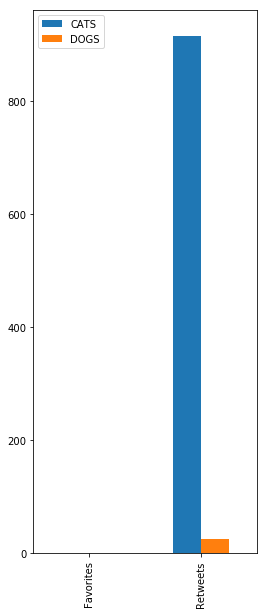

In [28]:
# okay, now for the bar graph
grouped = pd.DataFrame(columns = ['CATS', 'DOGS'])
grouped.set_value('Favorites', 'CATS', cat_fav)
grouped.set_value('Retweets', 'CATS', cat_rt)
grouped.set_value('Favorites', 'DOGS', dog_fav)
grouped.set_value('Retweets', 'DOGS', dog_rt)

grouped.plot.bar(figsize=(4,10))
plt.show()

### The number of favorites vs. the number of retweets, is so different you have to make the height 50 before you even see anything for the favorites, so why not take a closer look with two graphs?.. but this time using total sums instead of means...

In [22]:
#let's take a closer look at that, shall we?
#getting sums
cat_fav_total = tcat_df['tweetFavoriteCt'].sum()
cat_rt_total = tcat_df['tweetRetweetCt'].sum()

dog_fav_total = tdog_df['tweetFavoriteCt'].sum()
dog_rt_total = tdog_df['tweetRetweetCt'].sum()

,CATS,DOGS
Favorites,3065,NaN


,CATS,DOGS
Retweets,8267242,NaN


,CATS,DOGS
Favorites,3065,11627


,CATS,DOGS
Retweets,8267242,424000


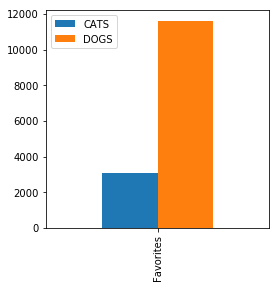

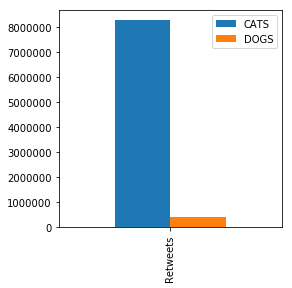

In [23]:
# okay, now for the bar graph, again
fav = pd.DataFrame(columns = ['CATS', 'DOGS'])
rt = pd.DataFrame(columns = ['CATS', 'DOGS'])
fav.set_value('Favorites', 'CATS', cat_fav_total)
rt.set_value('Retweets', 'CATS', cat_rt_total)
fav.set_value('Favorites', 'DOGS', dog_fav_total)
rt.set_value('Retweets', 'DOGS', dog_rt_total)

fav.plot.bar(figsize=(4,4))
plt.show()
rt.plot.bar(figsize=(4,4))
plt.show()

20.861693438606043

79.13830656139396

95.12152578423199

4.878474215768011

([<matplotlib.patches.Wedge at 0x11c134630>,
  <matplotlib.text.Text at 0x11c2c8c50>])

(-1.1287795697859777,
 1.1030602643274017,
 -1.1070503152331383,
 1.183392080918394)

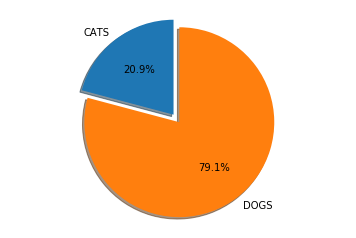

([<matplotlib.patches.Wedge at 0x11c22b748>,
  <matplotlib.text.Text at 0x11c3a7518>])

(-1.1226015200986625,
 1.0930205503727115,
 -1.2114783883192941,
 1.1053084984418842)

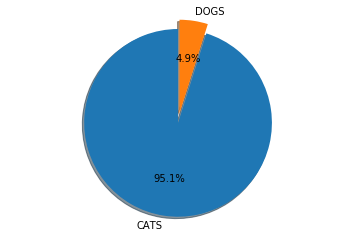

In [33]:
#figuring out percents
cd_fav_sum = cat_fav_total + dog_fav_total
cd_rt_sum = cat_rt_total + dog_rt_total

cat_fav_per = (cat_fav_total/cd_fav_sum)*100
cat_fav_per
dog_fav_per = (dog_fav_total/cd_fav_sum)*100
dog_fav_per

cat_rt_per = (cat_rt_total/cd_rt_sum)*100
cat_rt_per
dog_rt_per = (dog_rt_total/cd_rt_sum)*100
dog_rt_per

#pie charts

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['CATS','DOGS']
sizes = [cat_fav_per, dog_fav_per]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

labels = ['CATS','DOGS']
sizes = [cat_rt_per, dog_rt_per]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### It loks like dog posts are more likely to be favorites on average than cat posts on Twitter, but cat posts are more likelt to be retweeted? - this is an interesting change 
### It is also clear that retweeting is much more common than favoriting posts

## Let's look at location and find the most popular place for cat posts vs. dog posts

In [74]:
#Get rid of none values for the timezone
timecat_df = tcat_df[tcat_df.userTimezone.notnull()]
pop_cat = timecat_df.groupby('userLocation')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
pop_cat.head()

,tweetRetweetCt,tweetFavoriteCt
userLocation,,
,36.904762,0.219048
UK,1.000000,0.000000
#Ohio,31.833333,0.000000
#OtabaeDay,3.000000,0.000000
(In Vancouver),2.000000,1.000000


In [75]:
pop_cat.describe()

,tweetRetweetCt,tweetFavoriteCt
count,837.000000,837.000000
mean,25.013922,0.622074
std,178.635741,3.641473
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,5.000000,0.000000
max,3044.000000,74.500000


In [76]:
timedog_df = tdog_df[tdog_df.userTimezone.notnull()]
pop_dog = timedog_df.groupby('userLocation')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
pop_dog.head()

,tweetRetweetCt,tweetFavoriteCt
userLocation,,
,22.621032,0.459325
Arizona,3.000000,0.000000
Great Britain,0.000000,2.000000
In some place,1.500000,0.000000
Phoenix Arizona,7.000000,0.000000


In [77]:
pop_dog.describe()

,tweetRetweetCt,tweetFavoriteCt
count,1108.000000,1108.000000
mean,41.737362,0.477169
std,120.027097,2.161566
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,22.000000,0.000000
max,1460.000000,35.585366


#### What can we gather from this so far:
- dogs are retweeted more often than cats, but cats are liked more (THIS CHANGED SUDDENLY)
- cat mean: rt: 25, fav: 0.62
- dog mean: rt: 41.7, fav: 0.47
- it looks like the cat df has an extremely popular post with over 3,000 rt
- the most popular dog post is 1/2 of that
- It is also interesting that people are more likely to favorite a cat tweet, but then more likely to retweet a dog tweet.

## Moving on to Timezone

In [82]:
tz_cat = timecat_df.groupby('userTimezone')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
tz_cat.head()

,tweetRetweetCt,tweetFavoriteCt
userTimezone,,
Abu Dhabi,489.000000,0.000000
Alaska,17.869565,0.086957
America/Argentina/Buenos_Aires,3.666667,0.000000
America/Chicago,31.000000,0.250000
America/Detroit,29.000000,0.000000


In [83]:
tz_cat.describe()

,tweetRetweetCt,tweetFavoriteCt
count,104.000000,104.000000
mean,41.629981,0.499828
std,159.075238,1.289660
min,0.000000,0.000000
25%,0.500000,0.000000
50%,4.086957,0.023810
75%,18.452199,0.375000
max,1460.000000,10.222222


### Things to take note for cats:  
- Max: rt: 1460, fav: 10.2
- Most favorited tweet is from: JST
- Most retweeted tweet is from: Istanbul
- Mean: rt: 41.6, fav: 0.50

In [84]:
tz_dog = timedog_df.groupby('userTimezone')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
tz_dog.head()

,tweetRetweetCt,tweetFavoriteCt
userTimezone,,
Adelaide,0.000000,0.500000
Africa/Tunis,182.000000,0.000000
Alaska,8.045455,0.090909
America/Boise,0.000000,0.000000
America/Caracas,1.500000,0.000000


In [85]:
tz_dog.describe()

,tweetRetweetCt,tweetFavoriteCt
count,116.000000,116.000000
mean,56.021512,0.465491
std,170.128107,1.126535
min,0.000000,0.000000
25%,2.458333,0.000000
50%,12.089286,0.000000
75%,39.375000,0.519048
max,1460.000000,10.400000


### Things to take note for dogs:  
- Max: rt: 1460, fav: 10.4
- Most favorited tweet is from: America/Los_Angeles
- Most retweeted tweet is from: Nairobi
- Mean: rt: 56, fav: 0.46

### Some interesting findings:
- as I continue to play with the data I'm noticing some interesting things. 
- you can actually watch with this stuff (if you update frequently enough) specific memes gain popularity.

## Figuring out length of post